# Context


#### *What is India VIX*?
* The Volatility Index measures the market's anticipation of volatility in the near term. 
- During moments of market volatility, the market typically moves sharply up or down, and the VIX tends to climb.

- VIX falls as volatility falls. It is not the same as a price index like the NIFTY. 
- The price index is calculated by taking the price movement of the underlying equities into account.


#### *Scope of analysis*?
We will focusing on movment Nifty impacted by IndiaVix rather than focusing on how it is being impacted by option price.

As we are concerned with view of a quarter

# What questions are we trying to answer?




- Understand relationship between Nifty price behaviour with volatilty index?

- Probablity of volatilty in nifty when Vix is at a particular point? Looking at historical data?

- Impact of RBI interest rate? 

- Impact of RBI interest rate changed by particular points in a direction?


---
---
---
---

---
---
---
---

####  Pre-requiset Libraries


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Sourcing Data

>Imported data from "investing.com" for educational purposes

#### Making copies of data for data safety

In [2]:
data1 = pd.read_csv(r'C:\Users\ALIE-n-WARE\Desktop\IndiaVIXanalysis\Data\India VIX Historical Data.csv')
df1 = data1.copy()
df1.head(2)

,Date,Price,Open,High,Low,Vol.,Change %
0,08/27/2024,13.695,12.7100,14.0100,12.71,0.00K,-0.72%
1,08/26/2024,13.795,13.5525,13.9925,12.01,NaN,1.79%


In [3]:
data2 = pd.read_csv(r'C:\Users\ALIE-n-WARE\Desktop\IndiaVIXanalysis\Data\Nifty 50 Historical Data.csv')
df2 = data2.copy()
df2.head(2)

,Date,Price,Open,High,Low,Vol.,Change %
0,01/01/2008,"6,144.35","6,136.75","6,165.35","6,109.85",81.31B,0.09%
1,01/02/2008,"6,179.40","6,144.70","6,197.00","6,060.85",110.35B,0.57%


---

# Data PreProcessing

#### Correcting date format

In [4]:
# Convert 'date' columns to datetime if they are not already
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])


#### Joining data

In [5]:
# Merge DataFrames on 'date'
niftyvix = pd.merge(df1, df2, on='Date', how='inner')

#### Renaming Column for readablity

In [6]:
niftyvix.head(1)

,Date,Price_x,Open_x,High_x,Low_x,Vol._x,Change %_x,Price_y,Open_y,High_y,Low_y,Vol._y,Change %_y
0,2024-08-27,13.695,12.71,14.01,12.71,0.00K,-0.72%,"25,017.75","25,032.10","25,072.55","24,974.55",223.35K,0.03%


In [7]:
niftyvix = niftyvix.rename(columns={'Price_x': 'vclose', 'Open_x': 'vopen', 'High_x': 'vhigh','Low_x': 'vlow', 'Change %_x': 'vchange', 'Price_y': 'nclose', 'Open_y': 'nopen', 'High_y': 'nhigh', 'Low_y': 'nlow', 'Change %_y': 'nchange'})

In [8]:
niftyvix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4076 entries, 0 to 4075
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     4076 non-null   datetime64[ns]
 1   vclose   4076 non-null   float64       
 2   vopen    4076 non-null   float64       
 3   vhigh    4076 non-null   float64       
 4   vlow     4076 non-null   float64       
 5   Vol._x   2 non-null      object        
 6   vchange  4076 non-null   object        
 7   nclose   4076 non-null   object        
 8   nopen    4076 non-null   object        
 9   nhigh    4076 non-null   object        
 10  nlow     4076 non-null   object        
 11  Vol._y   4072 non-null   object        
 12  nchange  4076 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(8)
memory usage: 414.1+ KB


#### Values in **nchange** columns are **string**, we will change them to **float** 

In [9]:
niftyvix['nchange'].describe()

count       4076
unique       640
top       -0.10%
freq          31
Name: nchange, dtype: object

In [10]:
niftyvix['nchange'] = niftyvix['nchange'].str.rstrip('%').astype(float)
niftyvix['nchange'].describe()

count    4076.000000
mean        0.047866
std         1.287635
min       -12.980000
25%        -0.520000
50%         0.070000
75%         0.660000
max        17.740000
Name: nchange, dtype: float64

#### Values in **vchange** columns are **string**, we will change them to **float**

In [11]:
niftyvix['vchange'].describe()

count      4076
unique     1723
top       0.00%
freq         26
Name: vchange, dtype: object

In [12]:
niftyvix['vchange'] = niftyvix['vchange'].str.rstrip('%').astype(float)
niftyvix['vchange'].describe()

count    4076.000000
mean        0.151452
std         6.027993
min       -37.510000
25%        -2.800000
50%        -0.240000
75%         2.600000
max        64.360000
Name: vchange, dtype: float64

#### Values in **nclose,nopen,nhigh** columns are **string**  and also have **","** between numerals, we will remove "," and  change them to **float**

In [13]:
niftyvix['nclose'] = niftyvix['nclose'].str.replace(',', '').astype(float)
niftyvix['nopen'] = niftyvix['nopen'].str.replace(',', '').astype(float)
niftyvix['nhigh'] = niftyvix['nhigh'].str.replace(',', '').astype(float)
niftyvix['nlow'] = niftyvix['nlow'].str.replace(',', '').astype(float)

niftyvix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4076 entries, 0 to 4075
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     4076 non-null   datetime64[ns]
 1   vclose   4076 non-null   float64       
 2   vopen    4076 non-null   float64       
 3   vhigh    4076 non-null   float64       
 4   vlow     4076 non-null   float64       
 5   Vol._x   2 non-null      object        
 6   vchange  4076 non-null   float64       
 7   nclose   4076 non-null   float64       
 8   nopen    4076 non-null   float64       
 9   nhigh    4076 non-null   float64       
 10  nlow     4076 non-null   float64       
 11  Vol._y   4072 non-null   object        
 12  nchange  4076 non-null   float64       
dtypes: datetime64[ns](1), float64(10), object(2)
memory usage: 414.1+ KB


In [14]:
niftyvix

,Date,vclose,vopen,vhigh,vlow,Vol._x,vchange,nclose,nopen,nhigh,nlow,Vol._y,nchange
0,2024-08-27,13.6950,12.7100,14.0100,12.7100,0.00K,-0.72,25017.75,25032.10,25072.55,24974.55,223.35K,0.03
1,2024-08-26,13.7950,13.5525,13.9925,12.0100,NaN,1.79,25010.60,24906.10,25043.80,24874.70,210.27M,0.76
2,2024-08-23,13.5525,13.0000,13.6200,10.8400,NaN,4.25,24823.15,24845.40,24858.40,24771.65,206.80M,0.05
3,2024-08-22,13.0000,13.3325,13.7825,10.9575,NaN,-2.49,24811.50,24863.40,24867.35,24784.45,220.35M,0.17
4,2024-08-21,13.3325,13.8200,14.0450,11.8225,NaN,-3.53,24770.20,24680.55,24787.95,24654.50,257.11M,0.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4071,2008-03-11,32.6900,30.7200,37.5400,29.7500,NaN,0.34,4865.90,4796.30,4888.50,4732.85,158.76B,1.36
4072,2008-03-10,32.5800,25.3300,47.9500,25.3300,NaN,-7.44,4800.40,4767.80,4814.95,4620.50,155.88B,0.60
4073,2008-03-07,35.2000,36.9500,39.3400,27.0500,NaN,-0.87,4771.60,4918.30,4918.30,4672.25,145.78B,-3.04
4074,2008-03-05,35.5100,38.0800,38.7600,27.9500,NaN,-6.75,4921.40,4866.85,4936.75,4847.25,114.72B,1.17


#### Droping Vol._x which is vix volume because there are is not enough data in the column

In [15]:
niftyvix['Vol._x'].isna().count()

4076

In [16]:
niftyvix=niftyvix.drop('Vol._x',axis=1)

In [17]:
niftyvix.head(1)

,Date,vclose,vopen,vhigh,vlow,vchange,nclose,nopen,nhigh,nlow,Vol._y,nchange
0,2024-08-27,13.695,12.71,14.01,12.71,-0.72,25017.75,25032.1,25072.55,24974.55,223.35K,0.03


#### change Vol._y string values to float and correcting it for the values implied by M and K in the values and also removin the commas

> **UNDERSTANDING** : when making such changes to a column we right code from the perpective of making change to a single value, and that the iteration will take care of itself.

In [18]:
def convert_value(value):
    if isinstance(value, str):  # Ensure the value is a string
        # Remove commas for proper float conversion
        value = value.replace(',', '')
        if value.endswith('K'):
            return float(value[:-1]) * 1000
        elif value.endswith('M'):
            return float(value[:-1]) * 1000000
        elif value.endswith('B'):
            return float(value[:-1]) * 1000000000
        else:
            return float(value)  # No suffix, just convert to float
    elif isinstance(value, (int, float)):  # Handle numeric values directly
        return float(value)
    else:
        raise ValueError(f"Unsupported value type: {type(value)}")


In [19]:
niftyvix['Vol._y'] = niftyvix['Vol._y'].apply(convert_value)

####  renaming 'Vol._y': 'nvol'for better understanding

In [20]:
niftyvix = niftyvix.rename(columns={'Vol._y': 'nvol'})


In [21]:
niftyvix.describe()

,Date,vclose,vopen,vhigh,vlow,vchange,nclose,nopen,nhigh,nlow,nvol,nchange
count,4076,4076.000000,4076.000000,4076.000000,4076.000000,4076.000000,4076.000000,4076.000000,4076.000000,4076.000000,4.072000e+03,4076.000000
mean,2016-06-02 07:27:36.918547456,20.401995,20.403759,21.990286,18.740896,0.151452,9916.414328,9922.793106,9975.134948,9854.689659,2.300917e+11,0.047866
min,2008-03-04 00:00:00,10.135000,9.752500,10.702500,8.182500,-37.510000,2524.200000,2526.200000,2585.300000,2252.750000,2.233500e+05,-12.980000
25%,2012-04-19 18:00:00,14.534375,14.523750,15.086250,13.338750,-2.800000,5599.325000,5603.925000,5639.437500,5560.750000,1.305600e+11,-0.520000
50%,2016-06-02 12:00:00,17.630000,17.610000,18.320000,16.328750,-0.240000,8481.125000,8476.375000,8531.075000,8423.425000,1.814000e+11,0.070000
75%,2020-07-20 06:00:00,22.751875,22.720625,23.806250,21.120000,2.600000,11925.750000,11940.400000,11988.437500,11867.300000,2.831575e+11,0.660000
max,2024-08-27 00:00:00,85.130000,88.680000,92.530000,75.972500,64.360000,25017.750000,25032.100000,25078.300000,24974.550000,1.810970e+12,17.740000
std,NaN,9.248742,9.405809,11.795449,8.447832,6.027993,5214.681473,5217.274359,5231.048650,5194.781338,1.909322e+11,1.287635


turning dataframe upside down

In [22]:
niftyvix = niftyvix.iloc[::-1].reset_index(drop=True)

In [23]:
niftyvix.describe()

,Date,vclose,vopen,vhigh,vlow,vchange,nclose,nopen,nhigh,nlow,nvol,nchange
count,4076,4076.000000,4076.000000,4076.000000,4076.000000,4076.000000,4076.000000,4076.000000,4076.000000,4076.000000,4.072000e+03,4076.000000
mean,2016-06-02 07:27:36.918547456,20.401995,20.403759,21.990286,18.740896,0.151452,9916.414328,9922.793106,9975.134948,9854.689659,2.300917e+11,0.047866
min,2008-03-04 00:00:00,10.135000,9.752500,10.702500,8.182500,-37.510000,2524.200000,2526.200000,2585.300000,2252.750000,2.233500e+05,-12.980000
25%,2012-04-19 18:00:00,14.534375,14.523750,15.086250,13.338750,-2.800000,5599.325000,5603.925000,5639.437500,5560.750000,1.305600e+11,-0.520000
50%,2016-06-02 12:00:00,17.630000,17.610000,18.320000,16.328750,-0.240000,8481.125000,8476.375000,8531.075000,8423.425000,1.814000e+11,0.070000
75%,2020-07-20 06:00:00,22.751875,22.720625,23.806250,21.120000,2.600000,11925.750000,11940.400000,11988.437500,11867.300000,2.831575e+11,0.660000
max,2024-08-27 00:00:00,85.130000,88.680000,92.530000,75.972500,64.360000,25017.750000,25032.100000,25078.300000,24974.550000,1.810970e+12,17.740000
std,NaN,9.248742,9.405809,11.795449,8.447832,6.027993,5214.681473,5217.274359,5231.048650,5194.781338,1.909322e+11,1.287635


<Axes: >

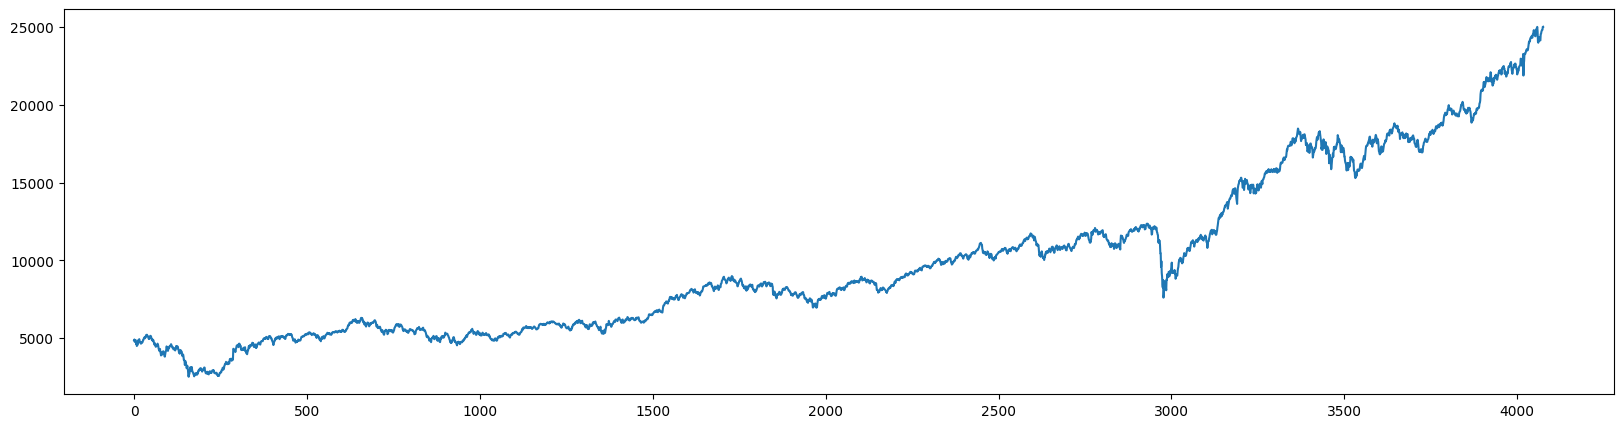

In [24]:
niftyvix['nclose'].plot(figsize=(20,5))

<Axes: >

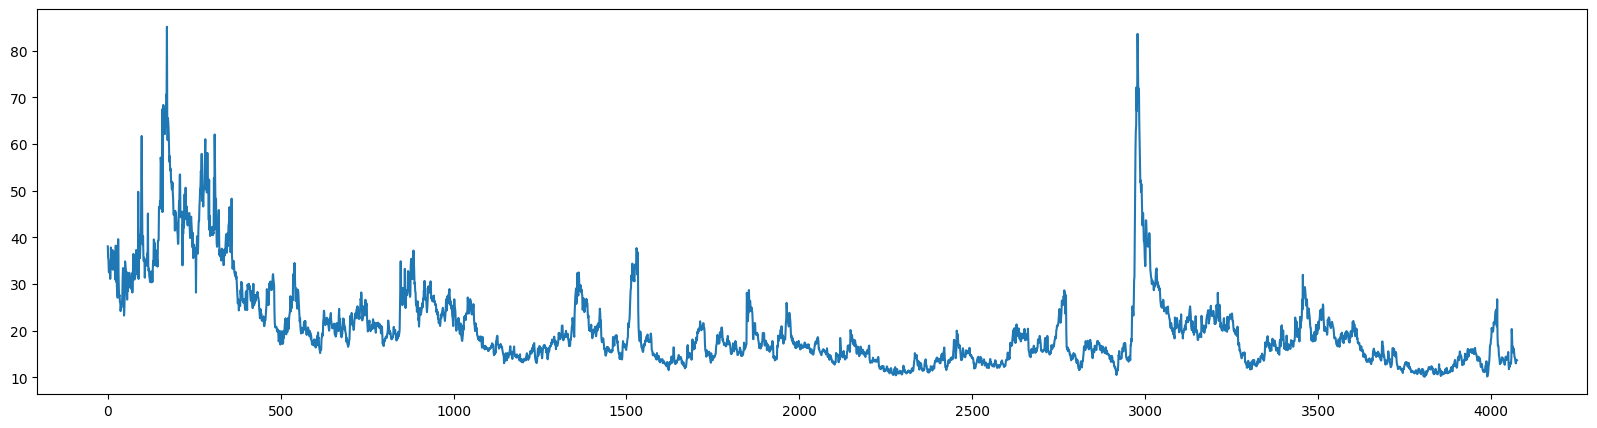

In [25]:
niftyvix['vclose'].plot(figsize=(20,5))

---
# Feature Engineering

## Create a shift of:
- 1 day
- 5 days
- 20 days

In [26]:
niftyvix['1day'] = niftyvix['nclose'].shift(1)
niftyvix['5day'] = niftyvix['nclose'].shift(5)
niftyvix['20day'] = niftyvix['nclose'].shift(20)
niftyvix['60day'] = niftyvix['nclose'].shift(60)

In [27]:
niftyvix.tail()

,Date,vclose,vopen,vhigh,vlow,vchange,nclose,nopen,nhigh,nlow,nvol,nchange,1day,5day,20day,60day
4071,2024-08-21,13.3325,13.8200,14.0450,11.8225,-3.53,24770.20,24680.55,24787.95,24654.50,257110000.0,0.29,24698.85,24139.00,24479.05,22957.10
4072,2024-08-22,13.0000,13.3325,13.7825,10.9575,-2.49,24811.50,24863.40,24867.35,24784.45,220350000.0,0.17,24770.20,24143.75,24413.50,22932.45
4073,2024-08-23,13.5525,13.0000,13.6200,10.8400,4.25,24823.15,24845.40,24858.40,24771.65,206800000.0,0.05,24811.50,24541.15,24406.10,22888.15
4074,2024-08-26,13.7950,13.5525,13.9925,12.0100,1.79,25010.60,24906.10,25043.80,24874.70,210270000.0,0.76,24823.15,24572.65,24834.85,22704.70
4075,2024-08-27,13.6950,12.7100,14.0100,12.7100,-0.72,25017.75,25032.10,25072.55,24974.55,223350.0,0.03,25010.60,24698.85,24836.10,22488.65


## Correlation between Nifty price and vix

#### All time data

In [28]:
niftyvix[['nclose','vclose']].corr()

,nclose,vclose
nclose,1.00000,-0.45539
vclose,-0.45539,1.00000


#### Three year data

In [29]:
niftyvix[['nclose','vclose']].tail(720).corr()

,nclose,vclose
nclose,1.000000,-0.425074
vclose,-0.425074,1.000000


#### One year data

In [30]:
niftyvix[['nclose','vclose']].tail(240).corr()

,nclose,vclose
nclose,1.000000,0.390487
vclose,0.390487,1.000000


In [31]:
niftyvix[['nclose','vclose']].tail(60).corr()

,nclose,vclose
nclose,1.000000,-0.647554
vclose,-0.647554,1.000000


In [32]:
niftyvix[['nclose','vclose']].tail(20).corr()

,nclose,vclose
nclose,1.000000,-0.874464
vclose,-0.874464,1.000000
